Featues Engineering

In [9]:
import pandas as pd
import numpy as np

In [10]:
df= pd.read_csv("client_data.csv")

In [11]:
df.head()

,client_id,Job Title,Description,Merged_Category,EX_level_demand
0,1,Power bi specialist freelance,Already data pooled and designed. Need to refi...,"Data Analysis, Data Visualization, Microsoft P...",Expert
1,2,Case Study (on-demand delivery startup),"Hi,\n\nWould you be able to help me do a case-...","Google Data Studio, SQL, Tableau, Microsoft Ex...",Intermediate
2,3,"File Maker Pro Reports, Charts, Query and Ongo...",NITIAL PROJECT\n\nSet up Monthly Report mimick...,"Report Writing, Custom Graphics",Intermediate
3,4,Implementation of EleutherAI/gpt-neox-20b,"As a first step, you will implement the instal...","Machine Learning Model, Machine Learning, Python",Expert
4,5,BI and Data Engineer for Upwork Finance System...,The Upwork Finance Systems team is looking for...,"Data Analysis, Looker, SQL, Snowflake, Account...",Expert


In [4]:
# For "Job Title"
df['job_title_length'] = df['Job Title'].apply(len)
df['job_title_word_count'] = df['Job Title'].apply(lambda x: len(x.split()))



In [5]:
# For "Description"
df['description_length'] = df['Description'].apply(len)
df['description_word_count'] = df['Description'].apply(lambda x: len(x.split()))


In [8]:
# Feature: Count the number of categories/skills
df['merged_category_count'] = df['Merged_Category'].apply(lambda x: len(str(x).split(',')) if isinstance(x, str) else 0)


# Create dummy variables for each category.
# The get_dummies method here uses comma as the separator.
df_categories = df['Merged_Category'].str.get_dummies(sep=',')
# Optionally, remove extra spaces from column names
df_categories.columns = [col.strip() for col in df_categories.columns]
# Join these new features back to the original DataFrame
df = pd.concat([df, df_categories], axis=1)


In [12]:
print(df.isnull().sum())

client_id            0
Job Title            0
Description          0
Merged_Category    366
EX_level_demand      0
dtype: int64


In [13]:
import pandas as pd
from collections import Counter

# Extract and clean skills
skills = df["Merged_Category"].str.lower().str.split(", ").explode().str.strip()

# Find unique skills and counts
skill_counts = Counter(skills)
print("Unique skills:", skill_counts.keys())
print("Skill frequencies:", skill_counts.most_common())

Unique skills: dict_keys(['data analysis', 'data visualization', 'microsoft power bi', 'sql', 'google data studio', 'tableau', 'microsoft excel', 'microsoft powerpoint', 'python', 'analytics', 'visualization', 'report writing', 'custom graphics', 'machine learning model', 'machine learning', 'looker', 'snowflake', 'accounting', 'generative adversarial network', 'computer vision', 'neural network', 'data analytics', 'big data', 'dashboard', 'business intelligence', 'hypothesis testing', 'microsoft azure', 'etl', 'azure devops', 'microsoft visual studio', 'data science', 'algorithm development', 'data extraction', 'matlab', 'statistics', 'surveymonkey', 'market research', 'bigquery', 'api', 'google cloud platform', 'etl pipeline', 'deep learning modeling', 'model optimization', 'model tuning', 'deep learning', 'data scraping', 'chatbot', 'artificial intelligence', 'chatgpt', 'tensorflow', 'artificial neural network', 'data entry', 'data mining', 'rapidminer', 'numpy', 'pandas', 'microsof

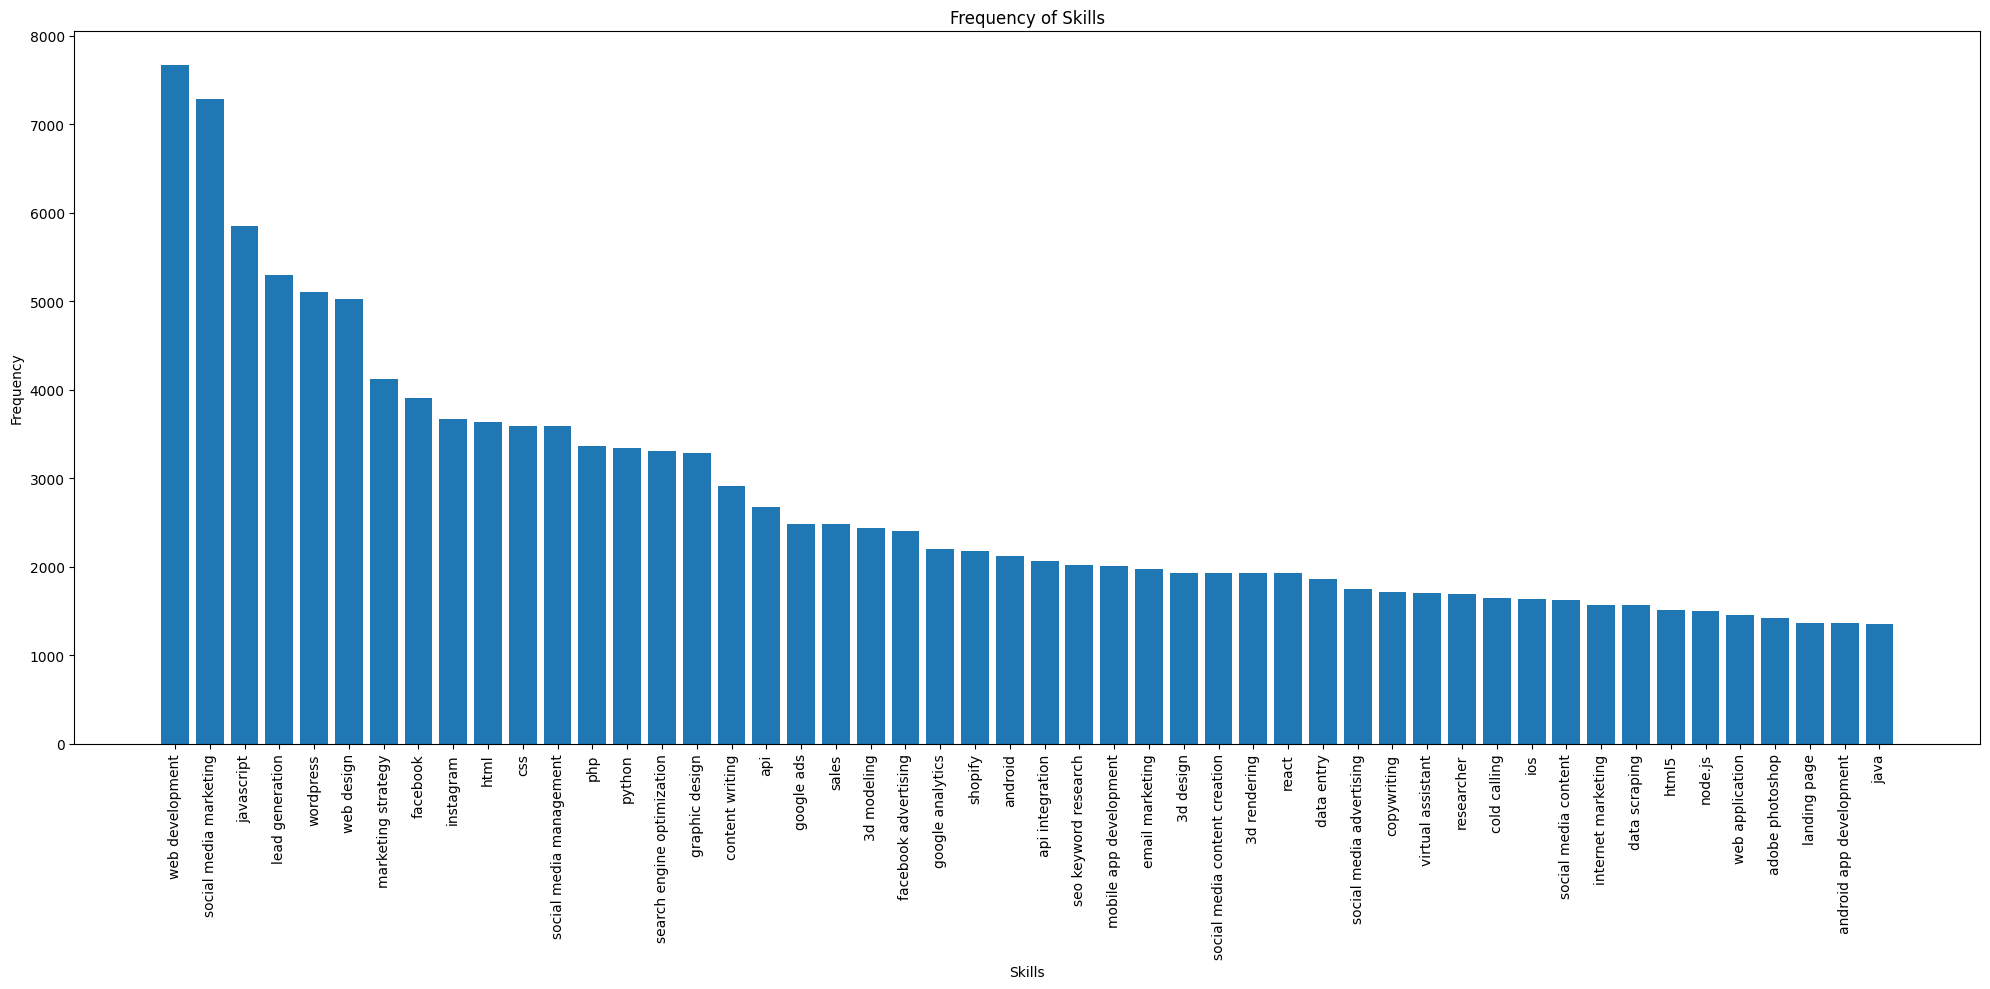

In [14]:
import matplotlib.pyplot as plt

# Assuming skill_counts is your Counter object from previous code
skills = list(skill_counts.keys())
counts = list(skill_counts.values())

# Sort by count if needed for better visualization
sorted_skills, sorted_counts = zip(*sorted(zip(skills, counts), key=lambda pair: pair[1], reverse=True))

# Plotting
plt.figure(figsize=(20, 10))
plt.bar(sorted_skills[:50], sorted_counts[:50])  # Show top 50 skills for clarity
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Frequency of Skills')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.tight_layout()
plt.show()

In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
print(type(skill_counts))
print(skill_counts)

<class 'collections.Counter'>
Counter({'web development': 7664, 'social media marketing': 7281, 'javascript': 5852, 'lead generation': 5297, 'wordpress': 5104, 'web design': 5018, 'marketing strategy': 4122, 'facebook': 3902, 'instagram': 3672, 'html': 3632, 'css': 3590, 'social media management': 3590, 'php': 3363, 'python': 3344, 'search engine optimization': 3310, 'graphic design': 3284, 'content writing': 2913, 'api': 2670, 'google ads': 2480, 'sales': 2479, '3d modeling': 2433, 'facebook advertising': 2407, 'google analytics': 2200, 'shopify': 2177, 'android': 2115, 'api integration': 2063, 'seo keyword research': 2018, 'mobile app development': 2011, 'email marketing': 1978, '3d design': 1932, 'social media content creation': 1931, '3d rendering': 1929, 'react': 1926, 'data entry': 1860, 'social media advertising': 1745, 'copywriting': 1709, 'virtual assistant': 1696, 'researcher': 1685, 'cold calling': 1646, 'ios': 1639, 'social media content': 1627, 'internet marketing': 1571, 

In [19]:
from collections import Counter

# Assuming skill_counts is a list of tuples or similar structure
skill_counts = Counter(dict(skill_counts))

In [20]:
# Convert float keys to strings if necessary
skill_counts = {str(k): v for k, v in skill_counts.items()}

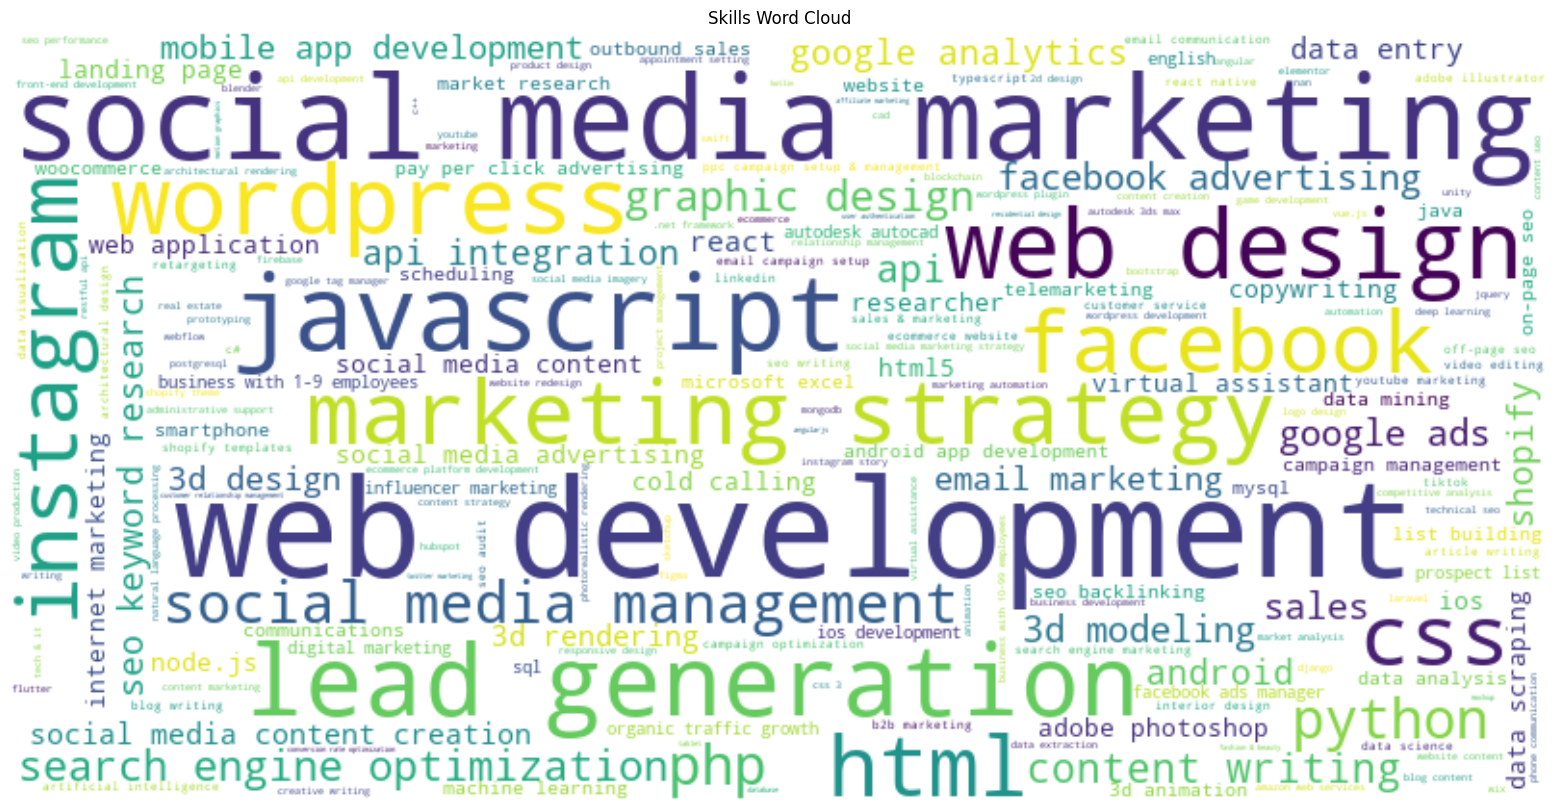

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming skill_counts is now correctly formatted
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud')
plt.show()

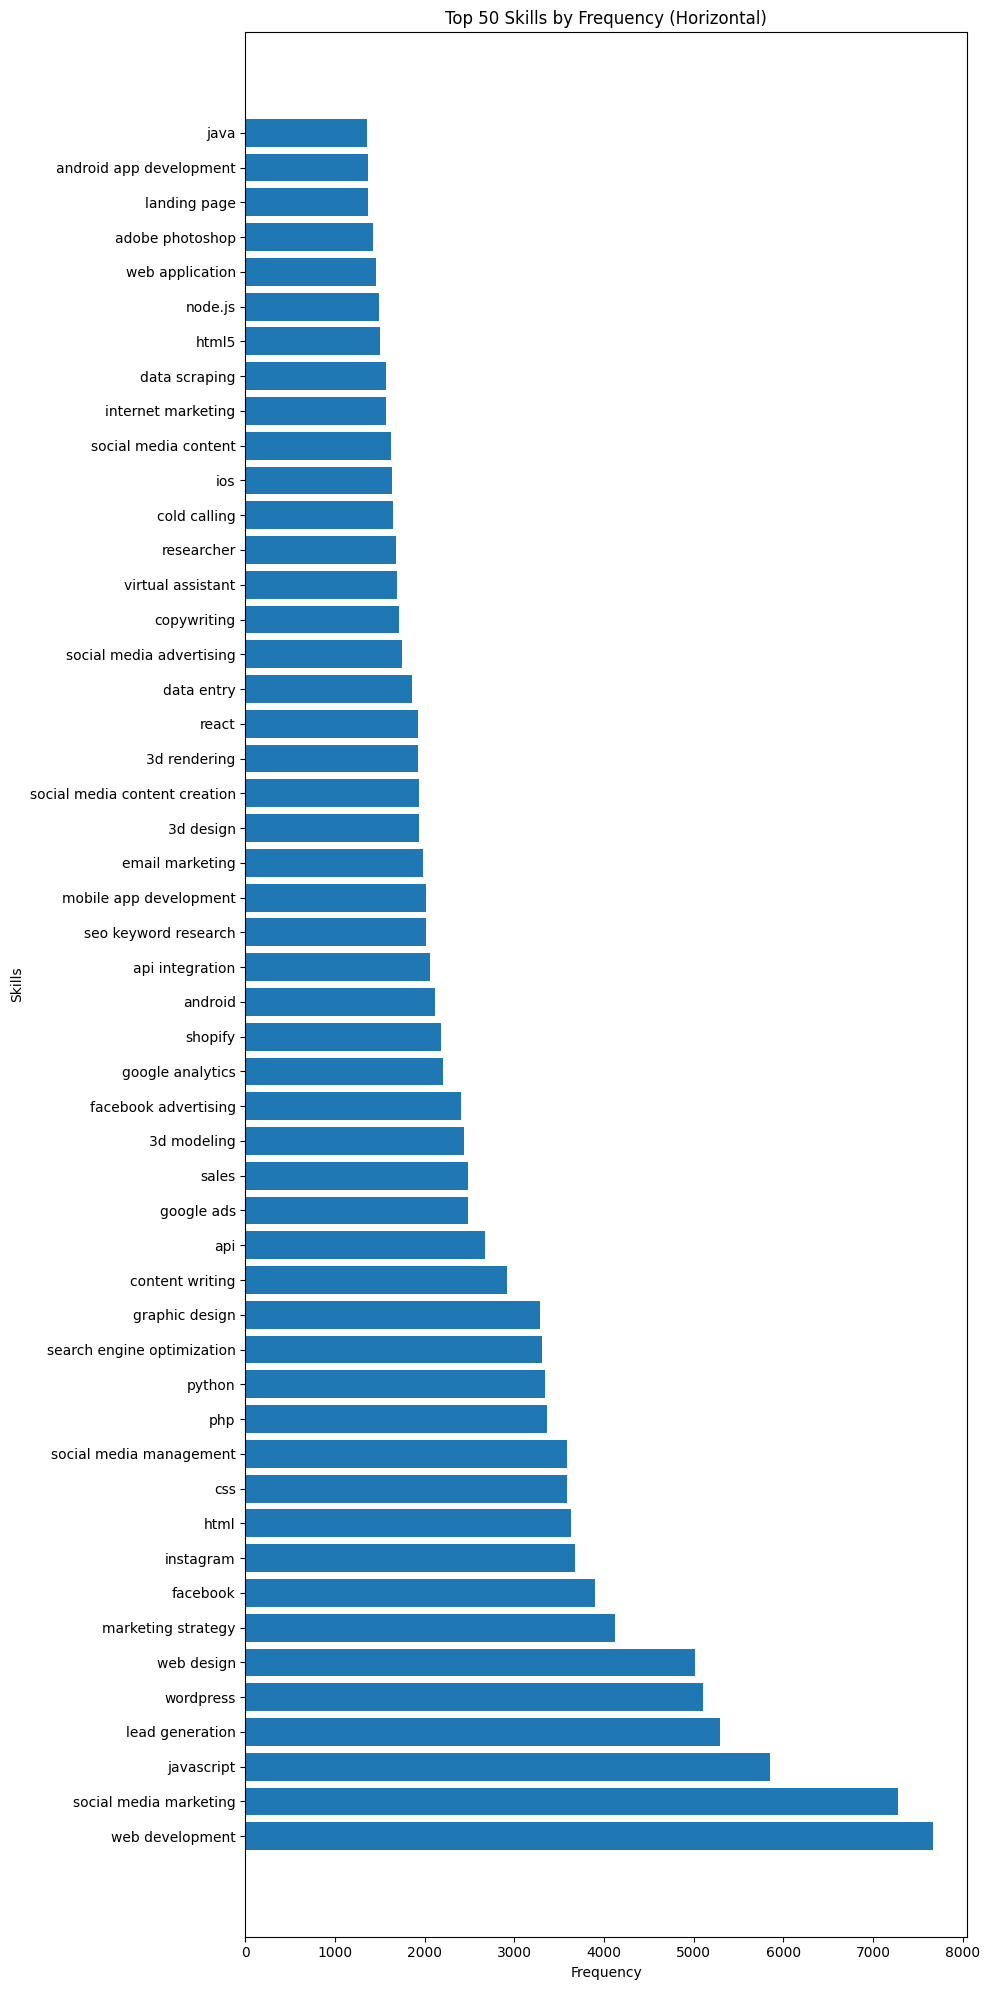

In [22]:
import matplotlib.pyplot as plt

# Sort by count for better visualization
sorted_skills, sorted_counts = zip(*sorted(zip(skills, counts), key=lambda pair: pair[1], reverse=True))

plt.figure(figsize=(10, 20))  # Adjust size for vertical space
plt.barh(sorted_skills[:50], sorted_counts[:50])
plt.ylabel('Skills')
plt.xlabel('Frequency')
plt.title('Top 50 Skills by Frequency (Horizontal)')
plt.tight_layout()
plt.show()

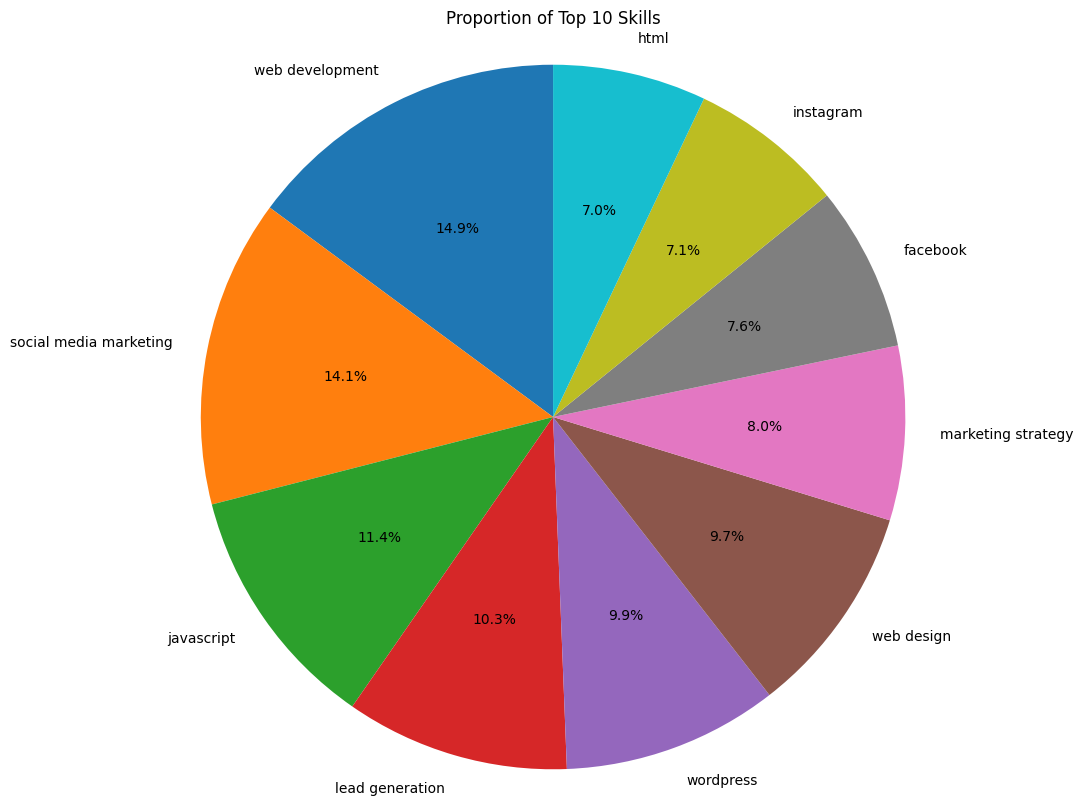

In [23]:
import matplotlib.pyplot as plt

# Focus on top 10 skills for example
top_skills = dict(sorted(skill_counts.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(10, 10))
plt.pie(top_skills.values(), labels=top_skills.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Top 10 Skills')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [24]:
pip install faker pandas

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker for generating realistic data
fake = Faker()

# Define tech fields and associated skills
tech_fields = {
    'Data Science': [
        'data analysis', 'data visualization', 'microsoft power bi', 'sql', 'google data studio', 'tableau', 
        'python', 'analytics', 'visualization', 'report writing', 'machine learning model', 'machine learning', 
        'looker', 'snowflake', 'data analytics', 'big data', 'dashboard', 'business intelligence', 
        'hypothesis testing', 'data science', 'statistics', 'bigquery', 'etl pipeline', 'deep learning modeling', 
        'model optimization', 'model tuning', 'deep learning', 'data scraping', 'artificial intelligence', 
        'chatgpt', 'tensorflow', 'artificial neural network', 'data mining', 'rapidminer', 'numpy', 'pandas', 
        'feature extraction', 'unsupervised learning', 'supervised learning', 'classification', 'linear regression', 
        'support vector machine', 'data interpretation', 'quantitative analysis', 'data cleansing', 'data segmentation', 
        'data processing', 'data wrangling', 'exploratory data analysis', 'recommendation system', 'time series analysis', 
        'bayesian statistics', 'gradient boosting'
    ],
    'Web Development': [
        'html', 'css', 'javascript', 'react', 'django', 'node.js', 'web development', 'php', 'mysql', 'database', 
        'web design', 'interactive design', 'web crawling', 'dbt', 'restful api', 'software developer', 
        'software architecture & design', 'api documentation', 'web application', 'html5', 'api integration', 
        'api development', 'web service', 'cms development', 'web scraping plugin', 'web scraping framework', 
        'flask', 'gatsby.js', 'jinja2', 'website', 'website to mobile app conversion', 'conversion to html', 
        'laravel', 'wordpress', 'wordpress plugin', 'web development plugin', 'html2text', 'virtual reality', 
        'webgl', 'web hosting'
    ],
    'Mobile Development': [
        'ios', 'android', 'ios development', 'android app development', 'swift', 'kotlin', 'react native', 
        'flutter', 'mobile app design', 'mobile app development', 'iphone ui design', 'mobile ui designer', 
        'ux wireframe', 'android sdk', 'ionic framework', 'hybrid app development', 'native app development', 
        'mobile app redesign', 'mobile app improvement', 'mobile app testing'
    ],
    'DevOps': [
        'microsoft azure', 'azure devops', 'azure openai', 'ci/cd', 'devops', 'devops engineering', 'docker', 
        'kubernetes', 'jenkins', 'ansible', 'automation', 'cloud computing', 'infrastructure management', 
        'cloud implementation', 'cloud architecture', 'gitlab', 'deployment automation', 'serverless computing', 
        'aws cloudfront', 'aws cloudformation', 'azure machine learning', 'azure app service', 'azure iot core', 
        'azure iot hub', 'azure cosmos db', 'azure blockchain service', 'azure devops server', 'openshift'
    ],
    'Cybersecurity': [
        'network security', 'ethical hacking', 'encryption', 'cyber threat intelligence', 'security testing', 
        'penetration testing', 'cybersecurity management', 'information security', 'security policies & procedures documentation', 
        'security assessment & testing', 'firewall', 'vpn', 'security infrastructure', 'personal information protection & electronic documents act',
        'information security consultation', 'source code scanning', 'web application security'
    ],
    'UI/UX Design': [
        'adobe xd', 'figma', 'user research', 'wireframing', 'prototyping', 'ux & ui', 'design enhancement', 
        'user experience design', 'user interface design', 'ux copy', 'visual communication', 'responsive design', 
        'ui/ux prototyping', 'user experience strategy', 'mobile ui design', 'usability testing'
    ],
    'Database Management': [
        'sql', 'mysql', 'postgresql', 'mongodb', 'mariadb', 'database management', 'database design', 'data modeling', 
        'database programming', 'database architecture', 'database administration', 'data warehousing', 
        'nosql database', 'oracle database', 'sql server integration services', 'microsoft sql server administration', 
        'oracle database administration', 'sql programming', 'transact-sql', 'database development'
    ],
    'Project Management': [
        'project management', 'project scheduling', 'digital project management', 'agile project management', 
        'scrum master', 'scrum', 'kanban methodology', 'project planning', 'project management office', 
        'project finance', 'project portfolio management', 'project management professional', 'team management', 
        'project delivery', 'change management', 'requirements specification', 'project timelines', 
        'project objectives', 'milestones', 'resource allocation', 'lean startup', 'lean consulting'
    ],
    'Marketing & SEO': [
        'search engine optimization', 'google ads', 'content marketing', 'email marketing', 'social media marketing', 
        'seo keyword research', 'seo audit', 'organic traffic growth', 'marketing strategy', 'market research', 
        'b2b marketing', 'content writing', 'google analytics', 'google tag manager', 'google analytics api', 
        'marketing analytics', 'conversion rate optimization', 'campaign optimization', 'google optimize', 
        'google adsense', 'google search console', 'on-page seo', 'off-page seo', 'technical seo', 'seo strategy', 
        'facebook pixel setup & optimization', 'analytics & tracking setup', 'google ad manager', 'facebook advertising', 
        'content seo', 'ecommerce marketing', 'linkedin marketing', 'instagram marketing', 'youtube marketing', 
        'influencer marketing', 'tiktok marketing', 'social media optimization', 'twitter marketing', 'social media strategy', 
        'social media account setup', 'community management', 'social media engagement'
    ],
    'Business & Consulting': [
        'business analysis', 'business writing', 'business plan', 'business development', 'business consulting', 
        'management consulting', 'business modeling', 'business process modeling', 'business process reengineering', 
        'business process automation', 'business strategy', 'business research', 'business management', 
        'organizational design & effectiveness', 'strategy', 'interpersonal skills', 'strategic plan', 
        'brand consulting', 'company research', 'business services', 'business intelligence software', 
        'business innovation', 'business operations', 'business coaching', 'business valuation', 
        'business planning & strategy', 'business presentation', 'sales strategy', 'sales leadership', 
        'sales development', 'sales management', 'outreach strategy', 'implementation plan', 'partnership development', 
        'relationship management', 'price & quote negotiation', 'leadership skills', 'organizational development', 
        'organizational structure', 'organizational behavior', 'organizational plan', 'corporate strategy', 
        'corporate governance', 'corporate social responsibility'
    ],
    'Writing & Content Creation': [
        'copywriting', 'content writing', 'article writing', 'blog content', 'blog writing', 'social media content', 
        'content localization', 'product documentation', 'technical writing', 'white paper', 'academic writing', 
        'research papers', 'book writing', 'speech writing', 'creative writing', 'fiction writing', 'journalism writing', 
        'editorial writing', 'content planning', 'content analysis', 'content creation', 'content strategy', 
        'content development', 'content audit', 'content marketing strategy', 'content guidelines', 'content seo', 
        'ghostwriting', 'storytelling', 'ebook writing'
    ],
    'Graphic & Visual Design': [
        'graphic design', 'adobe photoshop', 'adobe illustrator', 'adobe indesign', 'adobe after effects', 
        'adobe premiere pro', 'adobe lightroom', 'adobe dreamweaver', 'logo design', 'infographic', 'print design', 
        'branding', 'package graphics', 'visual presentation design', 'digital art', 'vector graphic', 
        'character design', 'digital illustration', 'concept artistry', 'freestyle drawing', 'illustration', 
        'visual art', 'typography', 'color palette', 'image editing', 'photo editing', 'photo retouching', 
        'photo manipulation', 'photo restoration', 'image tracing', 'image enhancement', 'digital painting', 
        'digital design', 'motion graphics', 'character animation', '3d design', '2d design', '3d modeling', 
        '3d texturing', '3d rendering', '3d animation', '3d illustration', '2d illustration', 'visual communication'
    ],
    'Translation & Languages': [
        'english', 'german', 'french', 'spanish', 'russian', 'chinese', 'japanese', 'portuguese', 'korean', 
        'dutch', 'italian', 'swedish', 'norwegian', 'danish', 'finnish', 'polish', 'czech', 'turkish', 'arabic', 
        'urdu', 'hindi', 'romanian', 'bulgarian', 'hebrew', 'greek', 'persian', 'thai', 'vietnamese', 'ukrainian', 
        'albanian', 'indonesian', 'malay', 'yoruba', 'swahili', 'translation', 'english to german translation', 
        'german to english translation', 'french to english translation', 'english to french translation', 
        'english to spanish translation', 'spanish to english translation', 'english to chinese translation', 
        'chinese to english translation', 'english to russian translation', 'russian to english translation', 
        'english to japanese translation', 'japanese to english translation', 'english to portuguese translation', 
        'portuguese to english translation', 'english to korean translation', 'korean to english translation', 
        'english to italian translation', 'italian to english translation', 'english to dutch translation', 
        'dutch to english translation', 'english to swedish translation', 'swedish to english translation', 
        'english to norwegian translation', 'norwegian to english translation', 'english to danish translation', 
        'danish to english translation', 'english to finnish translation', 'finnish to english translation', 
        'english to polish translation', 'polish to english translation', 'english to czech translation', 
        'czech to english translation', 'english to turkish translation', 'turkish to english translation', 
        'english to arabic translation', 'arabic to english translation', 'english to urdu translation', 
        'urdu to english translation', 'english to hindi translation', 'hindi to english translation', 
        'english to romanian translation', 'romanian to english translation', 'english to bulgarian translation', 
        'bulgarian to english translation', 'english to hebrew translation', 'hebrew to english translation', 
        'english to greek translation', 'greek to english translation', 'english to persian translation', 
        'persian to english translation', 'english to thai translation', 'thai to english translation', 
        'english to vietnamese translation', 'vietnamese to english translation', 'english to ukrainian translation', 
        'ukrainian to english translation', 'english to albanian translation', 'albanian to english translation', 
        'english to indonesian translation', 'indonesian to english translation', 'english to malay translation', 
        'malay to english translation', 'french to spanish translation', 'french to german translation', 
        'french to arabic translation'
    ],
    'Education & Training': [
        'teaching', 'training', 'tutoring', 'curriculum design', 'instructional design', 'curriculum development', 
        'program curriculum', 'course', 'elearning', 'education', 'higher education', 'distance education', 
        'educational technology', 'academic researcher', 'research writer', 'academic content development', 
        'academic editing', 'academic proofreading', 'academic writing', 'academic research', 'exam preparation', 
        'training materials', 'training presentation', 'training design', 'training plan', 'training online lms', 
        'learning management system', 'learning theory', 'teaching english', 'teaching spanish', 'training & development', 
        'workshop facilitation', 'presentation design', 'coaching', 'executive coaching', 'life coaching', 
        'career coaching', 'bilingual education', 'program management', 'program evaluation'
    ]
    # Add more fields as necessary, like 'Finance', 'Healthcare', etc.
}

# Function to generate random skills for a freelancer, including tech field specialization
def generate_skills():
    # Randomly select a tech field
    field = random.choice(list(tech_fields.keys()))
    
    # Get 2-4 skills from that field
    field_skills = random.sample(tech_fields[field], random.randint(2, 4))
    
    # Add some general tech skills or cross-field skills
    general_skills = ['project management', 'agile', 'git', 'sql', 'api']
    additional_skills = random.sample(general_skills, random.randint(0, 2))
    
    return f"{field}: {', '.join(field_skills)}; General: {', '.join(additional_skills)}"

# Function to generate experience level and years
def generate_experience():
    level = random.choice(['Entry Level', 'Intermediate', 'Expert'])
    years = random.randint(1 if level == 'Entry Level' else 3, 15 if level == 'Expert' else 10)
    return level, years

# Function to generate description based on skills
def generate_description(skills, level):
    field = skills.split(':')[0]
    return f"{level} {field} professional with experience in {skills.split(':')[1].split(';')[0].strip()}."

# Function to generate past projects
def generate_projects(level):
    num_projects = random.randint(1, 5) if level != 'Entry Level' else random.randint(1, 2)
    projects = []
    for _ in range(num_projects):
        project = f"{fake.sentence()} for {fake.company()}"
        projects.append(project)
    return '; '.join(projects)

# Function to generate budget based on experience level
def generate_budget(level):
    if level == 'Entry Level':
        hourly = random.randint(5, 15)
        project = f"${random.randint(50, 500)}-${random.randint(501, 1000)}"
    elif level == 'Intermediate':
        hourly = random.randint(15, 30)
        project = f"${random.randint(500, 1500)}-${random.randint(1501, 3000)}"
    else:  # Expert
        hourly = random.randint(30, 75)
        project = f"${random.randint(1500, 5000)}-${random.randint(5001, 10000)}"
    return hourly, project

# Generate dataset
num_freelancers = 100
data = []

for i in range(num_freelancers):
    freelancer_id = f"F{i+1:04d}"
    skills = generate_skills()
    experience_level, years = generate_experience()
    description = generate_description(skills, experience_level)
    projects = generate_projects(experience_level)
    hourly, project = generate_budget(experience_level)
    location = random.choice(['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Pune'])

    data.append({
        'Freelancer_ID': freelancer_id,
        'Skills': skills,
        'Experience_Level': experience_level,
        'Years_of_Experience': years,
        'Description': description,
        'Projects': projects,
        'Budget_Hourly': hourly,
        'Budget_Project': project,
        'Location': location
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('freelancers_dataset_specialized.csv', index=False)
print("Specialized dataset created and saved as 'freelancers_dataset_specialized.csv'")

Specialized dataset created and saved as 'freelancers_dataset_specialized.csv'
